In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

# Enigme 2: Les quatre chevelures
Les chevelures des 4 personnages sont colorées en orange ou bleu de manière aleatoire et indépendante. Votre joueur ne peut observer que la couleur de cheveux des trois autres personnage. Chaque joueur ne peut communiquer que par un mot. Comment faire pour que chacun devine sa couleur?

# Solution
Si le nombre de cheuvelure indigo est paire je dis orange, s'il est impaire de dire bleu. au fure et à mesure que les joueurs parlent, on peut déduire la couleur de cheveux de chacun.

# Créons un circuit quantique
 - Les 4 premières correspondent aux valeurs probables des couleurs de cheveux
 - Les 4 dernières correspondent aux valeurs prédites des couleurs de cheveux

Les valeurs de qubit de 0 à 3 sont inconues donc on les met en superposition avec une porte Hadamard


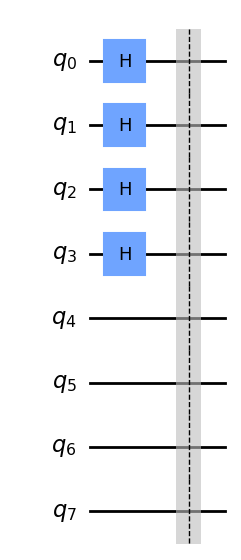

In [2]:
nb_qubits = 8
q = QuantumRegister(nb_qubits, 'q')

qc = QuantumCircuit(q)

for i in range(0, 4):
    qc.h(q[i])

qc.barrier()
qc.draw(output='mpl', style="clifford")

Le qubit 4 correspond à ce qu'observe votre joueur. ils faut donc lier les qubits 0 à 3 avec le qubit 4 avec des portes CNOT

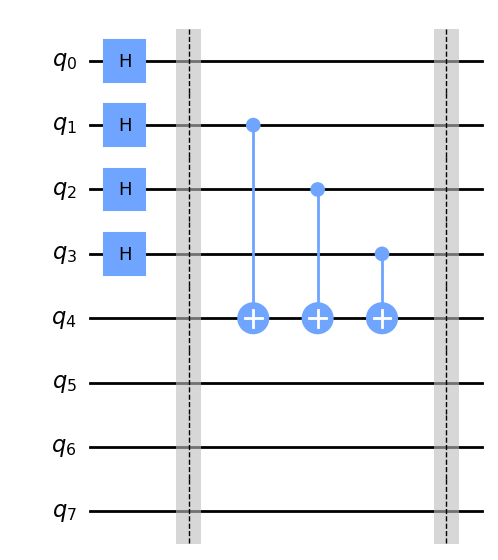

In [3]:
# apply CNOT gates between q4 and q 3, 2, 1
for i in [1, 2, 3]:
    qc.cx(q[i], q[4])
qc.barrier()
qc.draw(output='mpl', style="clifford")

Puis les autres joueurs entendent la réponse du premier joueur. On intrique le qubit 4 avec les qubits 5, 6 et 7

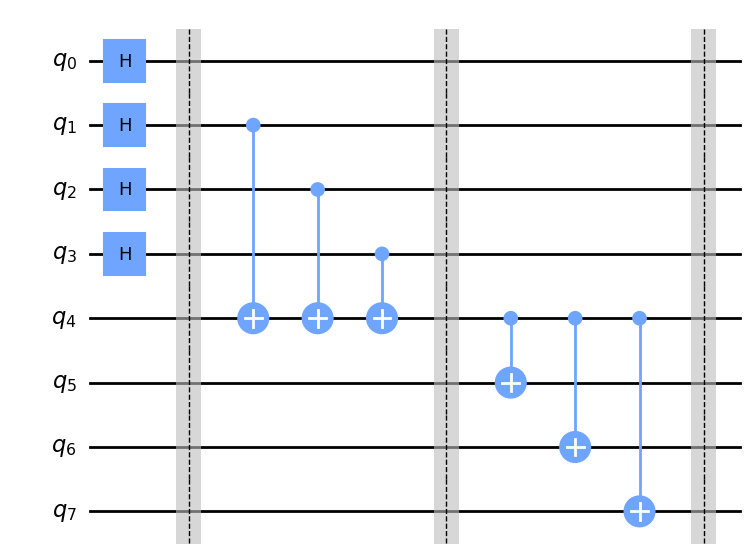

In [4]:
for i in [5, 6, 7]:
    qc.cx(q[4], q[i])
qc.barrier()
qc.draw(output='mpl', style="clifford")

Puis le second joueur va observer les chevelures devant lui. On intrique le 5 avec les qubits 2 et 3

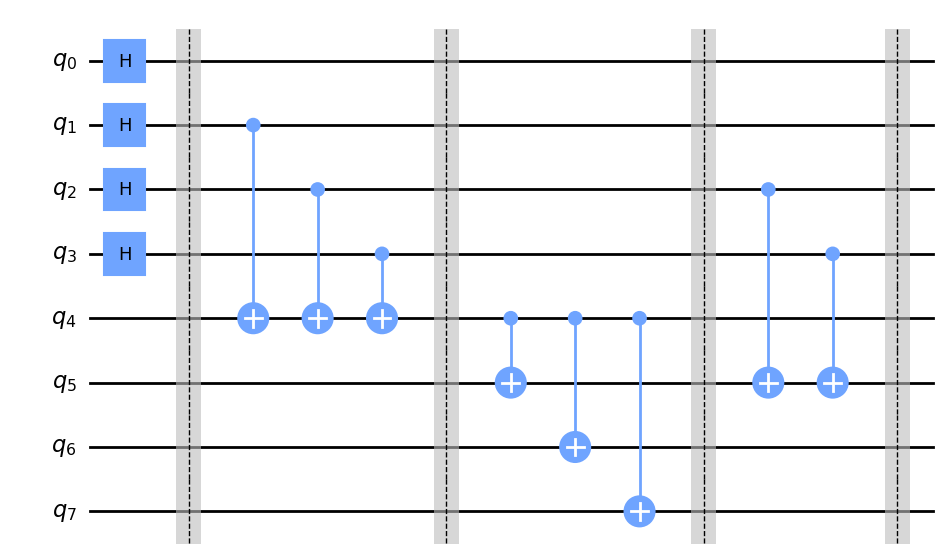

In [5]:
qc.cx(q[2], q[5])
qc.cx(q[3], q[5])

qc.barrier()
qc.draw(output='mpl', style="clifford")

Les 2 derniers participants vont entendre et l'avant-dernier va déduire sa couleur de cheveux. On intrique le qubit 5 avec les qubits 6 et 7. Puis l'avant-dernier participant va dire la couleur de celui qui est devant lui. 

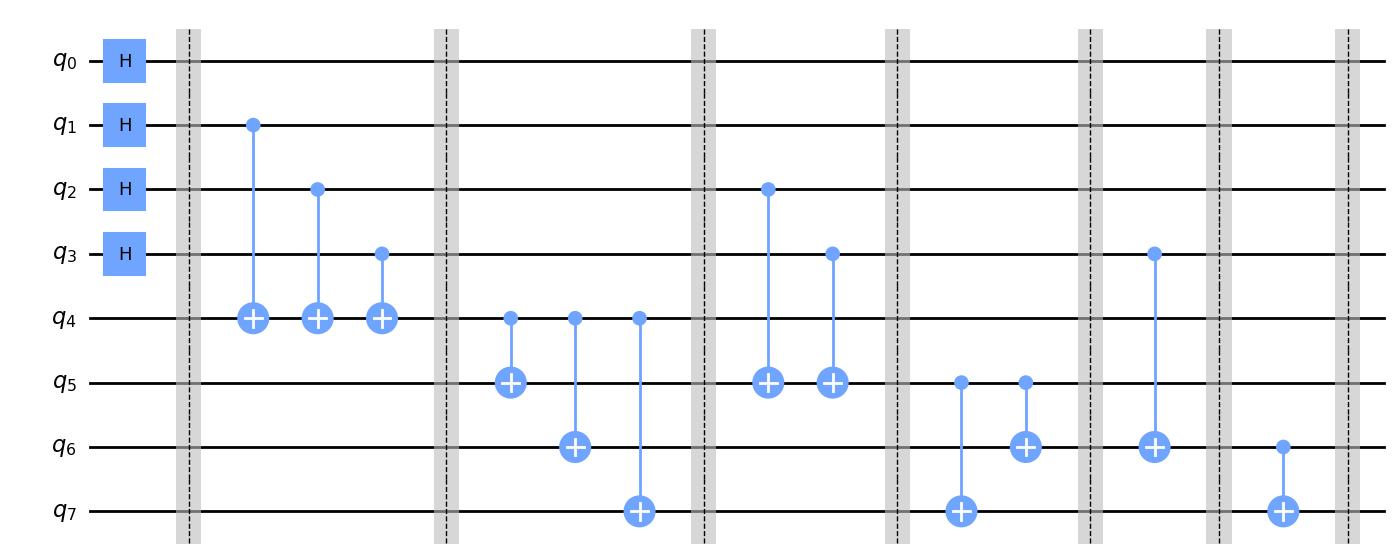

In [6]:
qc.cx(q[5], q[7])
qc.cx(q[5], q[6])
qc.barrier()

qc.cx(q[3], q[6])
qc.barrier()
qc.cx(q[6], q[7])
qc.barrier()

qc.draw(output='mpl', style="clifford")

On mesure tous les qubits

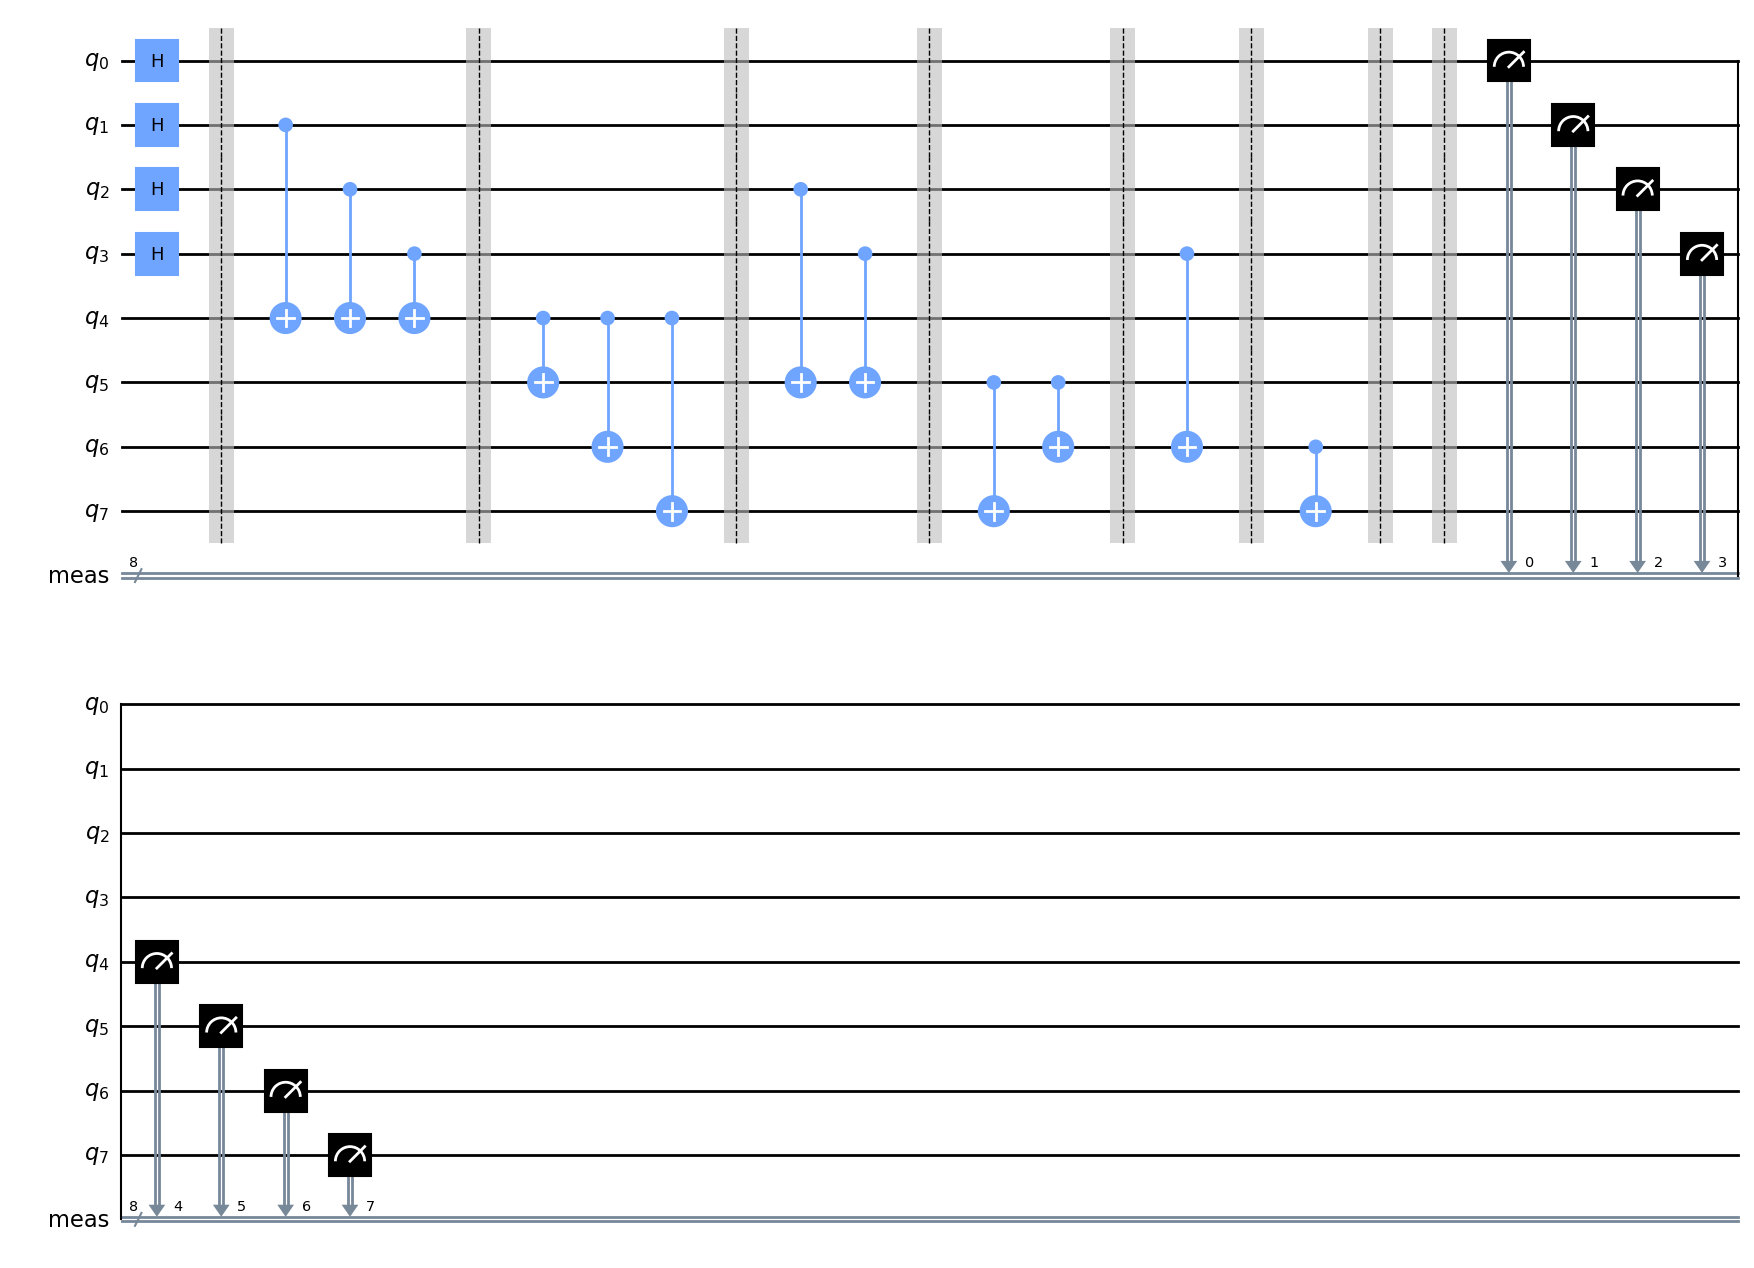

In [7]:
qc.measure_all()
qc.draw(output='mpl', style="clifford")

Faisont un echantillonage pour deduire les probabilités d'obtenir chaque résultat

In [8]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc, shots=10000)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)

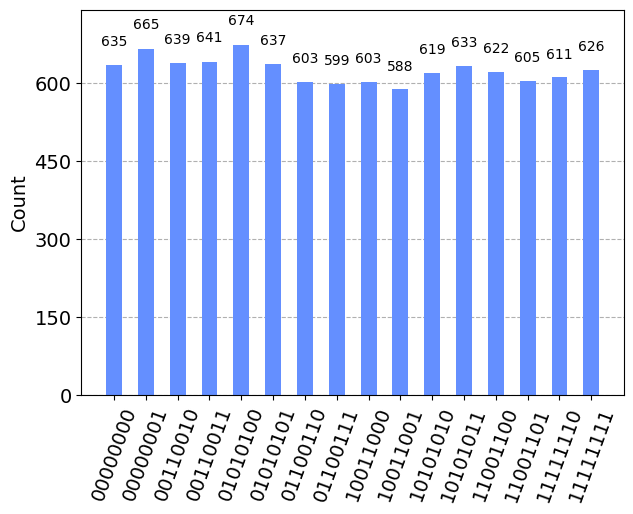

In [9]:
plot_histogram(result.get_counts(qc))

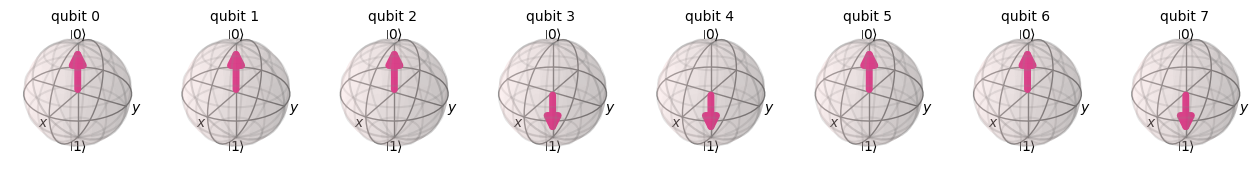

In [10]:
plot_bloch_multivector(outputstate)

Calculons les performances du circuit et de la stratégie

In [11]:

colors = ["orange", "blue"]
results = result.get_counts(qc)
accuracy = 0
for key, shots in results.items():
    key_list = list(key)
    trues = key_list[0:4]
    prediction = key_list[4:8]
    print("shots: ", shots)
    true_num = 0
    false_num = 0
    for true_val, prediction_val in zip(trues, prediction):
        
        if true_val == prediction_val:
            true_num += 1
        else:
            false_num += 1
        
    print("True: ", true_num, "False: ", false_num)
    print("Accuracy: ", true_num/4)
    accuracy += true_num/4 * shots


shots:  611
True:  3 False:  1
Accuracy:  0.75
shots:  665
True:  3 False:  1
Accuracy:  0.75
shots:  633
True:  3 False:  1
Accuracy:  0.75
shots:  605
True:  3 False:  1
Accuracy:  0.75
shots:  599
True:  3 False:  1
Accuracy:  0.75
shots:  639
True:  3 False:  1
Accuracy:  0.75
shots:  635
True:  4 False:  0
Accuracy:  1.0
shots:  619
True:  4 False:  0
Accuracy:  1.0
shots:  588
True:  4 False:  0
Accuracy:  1.0
shots:  637
True:  4 False:  0
Accuracy:  1.0
shots:  622
True:  4 False:  0
Accuracy:  1.0
shots:  641
True:  4 False:  0
Accuracy:  1.0
shots:  603
True:  4 False:  0
Accuracy:  1.0
shots:  626
True:  4 False:  0
Accuracy:  1.0
shots:  603
True:  3 False:  1
Accuracy:  0.75
shots:  674
True:  3 False:  1
Accuracy:  0.75


In [12]:
print("Accuracy: ", accuracy/10000)

Accuracy:  0.874275


# Conclusion
On obtient des très bon score avec cette stratégie, il est de 88%. On peut donc dire que cette stratégie est efficace.